Plotting the Distribution of the protein MFI for some cell cycle stage (i.e. G1) at some time (i.e., 2 min). The distribution of protein shows that the distribution of the protein MFIs are non-normal and have some negative values.
Author: Indrani Nayak

<class 'dict'>
<class 'list'>
b'54'
6214
[b'Time', b'Cell_length', b'IdU', b'CD11a', b'pSHP2', b'CD96', b'pStat1', b'pSrc', b'pAMPK', b'CD94', b'pGSK', b'148', b'DNAM1', b'pStat5', b'CD107a', b'pAkt', b'pMAPKAPK2', b'NKG2D', b'CCR7', b'pNFkB', b'pRb', b'pErk12', b'pHis3', b'CD25', b'pMARCKS', b'pVav1', b'DNA1', b'DNA2', b'102', b'104', b'105', b'106', b'108', b'110', b'CD45', b'CRACC', b'p38', b'SAP', b'Ki67', b'2B4', b'DAP12', b'CD69', b'EAT2', b'cyclinB', b'p120cateni', b'pS6', b'cPARP', b'NKG2A', b'pCreb', b'cisplatin', b'beadDist', b'barcode', b'UMAP_1', b'UMAP_2']
The smallest positive value is: 1.9524197796272347e-06
It is located in column index: 30
The parameter (protein) with the smallest positive value is: b'110'
b'110'
len=6214


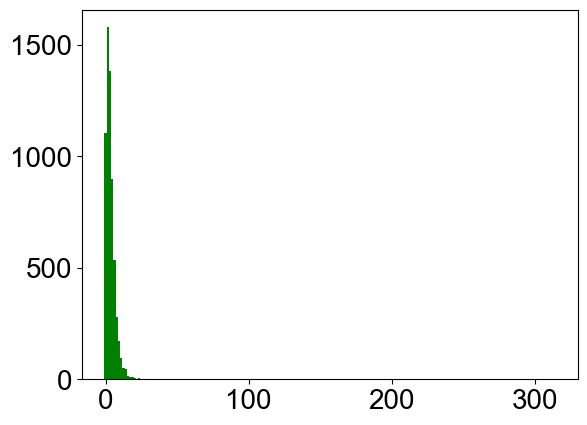

the size of data is 6214
The average value of the protein is 3.696426473543002
minimum value for a particular protein is 1.9524197796272347e-06


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fcsextract

#greg's gating 
# path = './data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_'
# filename=path+'2min_CD56dim_UMAP_G1.fcs'

#NKL
path='./data/NKL_greg/NKG2D/NKG2D_'
filename= path+'64min_UMAP_G1.fcs' #note: These are CD56 dim cells


 # Use fcsextract to parse the FCS file
metadata, data = fcsextract.fcsextract(filename)



print(type(metadata))   #dictionary
print(type(data)) #list
data=np.array(data)

print(metadata[b'$PAR']) #number of parameters
print(len(data[:,1]))

#extracting param_names
param_names = []
for i in range(int(metadata[b'$PAR'])):
      param_names.append(metadata.get(b"$P%dS"%(i+1),metadata[b"$P%dN"%(i+1)]))
  
#print(param_names)

print(param_names)
data=data[:,3:49] #NKL
param_names=param_names[3:49]


# data=data[:,8:48]
# param_names=param_names[8:48]

# Find the smallest positive number in the data
positive_data = data[data > 0]  # Filter out non-positive numbers (<= 0)
# Find the smallest positive value
smallest_positive_value = np.min(positive_data)

# Now, find the index of the column that has the smallest positive value
# We can use np.where() to find the indices of all values in the dataset that are equal to the smallest positive value
# Then we map these indices back to the original columns (parameters)

# Find the indices of the smallest positive value in the original data (including the column and row)
indices = np.where(data == smallest_positive_value)

# indices[0] gives the row index and indices[1] gives the column index
# Get the column index of the smallest positive value
column_index = indices[1][0]  # Take the first occurrence if there are multiple

# Retrieve the name of the parameter (protein) corresponding to that column index
param_name_with_smallest_value = param_names[column_index]

print(f"The smallest positive value is: {smallest_positive_value}")
print(f"It is located in column index: {column_index}")
print(f"The parameter (protein) with the smallest positive value is: {param_name_with_smallest_value}")






#plotting histogram of the protein
#index=33 #CD69
index=column_index  #CD107a
#index=42 #EAT2
print(param_names[index])
Y=data[:,index]
print(f"len={len(Y)}")


Y_pos=Y[Y>0]


#plt.xlim(-50,200)

# # Calculate the minimum value of the data
# min_value = np.min(Y)
    
# # Calculate the constant to add so that the minimum value becomes 1e-11
# constant_to_add = 1e-11 - min_value if min_value < 1e-11 else 0
    
# # Add the constant to all elements of the data if needed
# if constant_to_add > 0:
#        Y += constant_to_add


plt.hist(Y,bins=200,color='g')#
#plt.hist(Y,bins=200,range=[-20, +20],color='g')
plt.show()



size_of_data=len(Y)
print(f'the size of data is {size_of_data}')
avg_protein=np.mean(Y)
print(f'The average value of the protein is {avg_protein}')
print(f'minimum value for a particular protein is {np.min(Y_pos)}')


This is the same thing using other library FlowCal. Just keep the index same.

(5390, 56)
('Time', 'Cell_length', '(Pd102)Di', '(Pd104)Di', '(Pd105)Di', '(Pd106)Di', '(Pd108)Di', '(Pd110)Di', '(In113)Di', '(In115)Di', '(I127)Di', '(La139)Di', '(Pr141)Di', '(Nd142)Di', '(Nd143)Di', '(Nd144)Di', '(Nd145)Di', '(Nd146)Di', '(Sm147)Di', '(Nd148)Di', '(Sm149)Di', '(Nd150)Di', '(Eu151)Di', '(Sm152)Di', '(Eu153)Di', '(Sm154)Di', '(Gd155)Di', '(Gd156)Di', '(Gd157)Di', '(Gd158)Di', '(Tb159)Di', '(Gd160)Di', '(Dy161)Di', '(Dy162)Di', '(Dy163)Di', '(Dy164)Di', '(Ho165)Di', '(Er166)Di', '(Er167)Di', '(Er168)Di', '(Tm169)Di', '(Er170)Di', '(Yb171)Di', '(Yb172)Di', '(Yb173)Di', '(Yb174)Di', '(Lu175)Di', '(Yb176)Di', '(Ir191)Di', '(Ir193)Di', '(Pt195)Di', 'FileNum', 'beadDist', 'barcode', 'UMAP_1', 'UMAP_2')
(Eu151)Di


(array([107., 179., 351., 358., 352., 384., 331., 411., 346., 317., 377.,
        344., 350., 342., 136.,  52.,  33.,  50.,  53.,  45.,  59.,  43.,
         55.,  42.,  37.,  45.,  58.,  29.,  13.,   6.,   3.,   4.,   7.,
          5.,   1.,   4.,   5.,   9.,   7.,   5.,   3.,   2.,   2.,   0.,
          1.,   1.,   3.,   1.,   4.,   2.,   1.,   1.,   0.,   0.,   2.,
          1.,   0.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.]),
 array([-1.09397423, -1.01739061, -0.94080693, -0.8642233 , -0.78763962,
        -0.71105599, -0.63447231, -0.55788869, -0.48130503, -0.40472138,
        -0.32813776, -0.2515541 , -0.17497045, -0.09838679, -0.02180315,
         0.0547805 ,  0.13136415,  0.20794781,  0.28453144,  0.3611151 ,
         0.43769875,  0.51

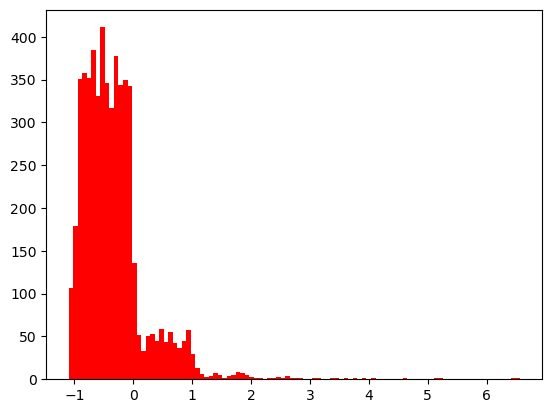

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import FlowCal

#greg's gating 
path='./data/primary/greg_umaps/untransformed/debarcode_IL2_NKG2D_'
filename=path+'2min_CD56dim_UMAP_G1.fcs'


s = FlowCal.io.FCSData(filename)
print(s.shape)   
print(s.channels)
index=22
print(s.channels[index])
qq=s.channels[index]
plt.hist(s[:,str(qq)],bins=100,color='r')



Check the likelihood of the data Normal vs. log normal Date Jan 13, 2025


<class 'dict'>
<class 'list'>
b'56'
3845
[b'time', b'cell_length', b'BC1', b'BC2', b'BC3', b'BC4', b'BC5', b'BC6', b'CD7', b'CD45', b'IdU', b'CD57', b'3_gp_61_15', b'CD96', b'pCrkL', b'Cholera-b', b'pH3', b'pPLCg2', b'CD8', b'CD16', b'pCreb', b'pSTAT5', b'CD107a', b'pAkt', b'MAPKAPK2', b'NKG2D', b'CRACC', b'cyclinB', b'SAP', b'CD161', b'CD11c', b'2B4', b'DAP12', b'CD69', b'EAT2', b'pSLP76', b'pNFkB', b'pRb', b'pErk1-2', b'pPlk1', b'p38', b'pLAT', b'pZAP70', b'pS6', b'Ki67', b'NKG2A', b'pVav1', b'CD56', b'DNA1', b'DNA2', b'cisplatin', b'File Number', b'beadDist', b'barcode', b'UMAP_1', b'UMAP_2']
b'CD69'
len=3845


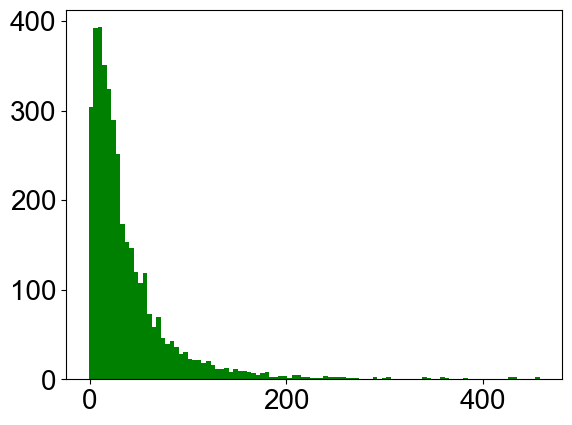

the size of data is 3845
The average value of the protein is 38.5737957912077
<class 'numpy.ndarray'>
Log-Likelihood for Normal Distribution: -19927.76698531171
Log-Likelihood for Log-Normal Distribution: -17793.247875774072
AIC for Normal Distribution: 39859.53397062342
AIC for Log-Normal Distribution: 35590.495751548144


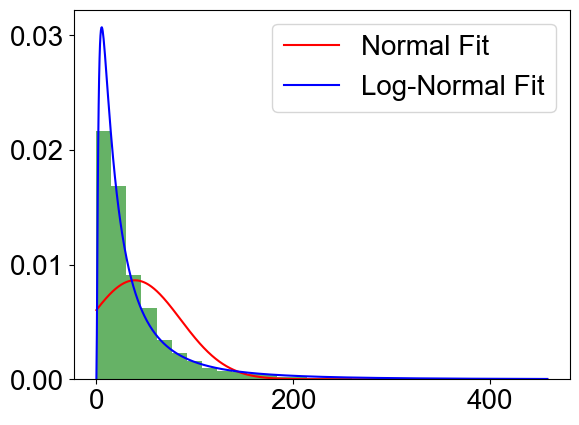

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fcsextract
from scipy.stats import norm, lognorm
from scipy.optimize import minimize

#greg's gating 
path='./data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_'
filename=path+'256min_CD56dim_UMAP_G1.fcs'

 # Use fcsextract to parse the FCS file
metadata, data = fcsextract.fcsextract(filename)

print(type(metadata))   #dictionary
print(type(data)) #list
data=np.array(data)

print(metadata[b'$PAR']) #number of parameters
print(len(data[:,1]))

#extracting param_names
param_names = []
for i in range(int(metadata[b'$PAR'])):
      param_names.append(metadata.get(b"$P%dS"%(i+1),metadata[b"$P%dN"%(i+1)]))
  
#print(param_names)

print(param_names)
#plotting histogram of the protein
index=33
print(param_names[index])
Y=data[:,index]
print(f"len={len(Y)}")
#Y=np.random
#Y=Y[Y>0]

plt.hist(Y,bins=100,color='g')#
#plt.hist(Y,bins=200,range=[-20, +20],color='g')
plt.show()


size_of_data=len(Y)
print(f'the size of data is {size_of_data}')
avg_protein=np.mean(Y)
print(f'The average value of the protein is {avg_protein}')

print(type(Y))
Y=Y[Y>0]

# Assuming 'data' is your protein expression data
data = Y

# Fit Normal Distribution
mu_norm, sigma_norm = norm.fit(data)
log_likelihood_normal = np.sum(np.log(norm.pdf(data, mu_norm, sigma_norm)))

# Fit Log-Normal Distribution (log-transform data first)
#Y[Y < 0] = 1e-1  # Replace any negative values with a small positive value

log_data = np.log(data)
mu_lognorm, sigma_lognorm = norm.fit(log_data)
log_likelihood_lognormal = np.sum(np.log(lognorm.pdf(data, sigma_lognorm, scale=np.exp(mu_lognorm))))

# Compare Log-Likelihoods
print(f'Log-Likelihood for Normal Distribution: {log_likelihood_normal}')
print(f'Log-Likelihood for Log-Normal Distribution: {log_likelihood_lognormal}')

# Calculate AIC scores
k_normal = 2  # Number of parameters for normal distribution (mu, sigma)
k_lognormal = 2  # Number of parameters for log-normal distribution (mu, sigma)

AIC_normal = 2 * k_normal - 2 * log_likelihood_normal
AIC_lognormal = 2 * k_lognormal - 2 * log_likelihood_lognormal

print(f'AIC for Normal Distribution: {AIC_normal}')
print(f'AIC for Log-Normal Distribution: {AIC_lognormal}')

# Visual Comparison
x = np.linspace(min(data), max(data), 1000)
pdf_normal = norm.pdf(x, mu_norm, sigma_norm)
pdf_lognormal = lognorm.pdf(x, sigma_lognorm, scale=np.exp(mu_lognorm))

plt.hist(data, bins=30, density=True, alpha=0.6, color='g')
plt.plot(x, pdf_normal, 'r-', label='Normal Fit')
plt.plot(x, pdf_lognormal, 'b-', label='Log-Normal Fit')
plt.legend()
plt.show()

Here is the histogram for CD69 and CD107a in primary NK cell Date Feb 13, 2025

b'56'
2430
The mimimum intensity is 1.5497778804274276e-05
[b'time', b'cell_length', b'BC1', b'BC2', b'BC3', b'BC4', b'BC5', b'BC6', b'CD7', b'CD45', b'IdU', b'CD57', b'3_gp_61_15', b'CD96', b'pCrkL', b'Cholera-b', b'pH3', b'pPLCg2', b'CD8', b'CD16', b'pCreb', b'pSTAT5', b'CD107a', b'pAkt', b'MAPKAPK2', b'NKG2D', b'CRACC', b'cyclinB', b'SAP', b'CD161', b'CD11c', b'2B4', b'DAP12', b'CD69', b'EAT2', b'pSLP76', b'pNFkB', b'pRb', b'pErk1-2', b'pPlk1', b'p38', b'pLAT', b'pZAP70', b'pS6', b'Ki67', b'NKG2A', b'pVav1', b'CD56', b'DNA1', b'DNA2', b'cisplatin', b'File Number', b'beadDist', b'barcode', b'UMAP_1', b'UMAP_2']
b'56'
423
The mimimum intensity is 0.00021778182417619973
[b'time', b'cell_length', b'BC1', b'BC2', b'BC3', b'BC4', b'BC5', b'BC6', b'CD7', b'CD45', b'IdU', b'CD57', b'3_gp_61_15', b'CD96', b'pCrkL', b'Cholera-b', b'pH3', b'pPLCg2', b'CD8', b'CD16', b'pCreb', b'pSTAT5', b'CD107a', b'pAkt', b'MAPKAPK2', b'NKG2D', b'CRACC', b'cyclinB', b'SAP', b'CD161', b'CD11c', b'2B4', b'DAP12

/var/folders/27/2mt59p_d75v41mn8g7fdn2nc0000gq/T/ipykernel_32339/3152651960.py:32: RuntimeWarning: invalid value encountered in log
  Y = np.log(Y)


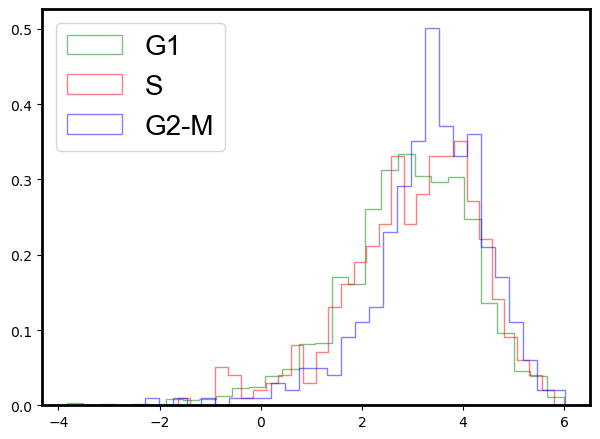

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fcsextract


def plotting_histogram(filename):

    # Use fcsextract to parse the FCS file
    metadata, data = fcsextract.fcsextract(filename)

    data = np.array(data)

    print(metadata[b'$PAR'])  # number of parameters
    print(len(data[:, 1]))
    pos_data=data[data>0]
    minimum_data=np.min(pos_data)
    print(f"The mimimum intensity is {minimum_data}")
    # extracting param_names
    param_names = []
    for i in range(int(metadata[b'$PAR'])):
        param_names.append(metadata.get(b"$P%dS" % (i + 1), metadata[b"$P%dN" % (i + 1)]))
    
    print(param_names)
    
    # plotting histogram of the protein
    #index = 22 #CD107a
    index=33 #CD69
    Y = data[:, index]
    #Y[Y < 0] = 1e-11
    Y = np.log(Y)
    return Y

# greg's gating
path = './data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_'
time='64'
filename1 = path + time+'min_CD56dim_UMAP_G1.fcs'
filename2 = path + time+'min_CD56dim_UMAP_S.fcs'
filename3 = path + time+'min_CD56dim_UMAP_G2.fcs'

Y1 = plotting_histogram(filename1)
plt.hist(Y1, bins=30, color='g', density=True, alpha=0.5, label='G1',edgecolor='g',histtype='step')  # Adjust alpha for transparency

Y2 = plotting_histogram(filename2)
plt.hist(Y2, bins=30, color='r', density=True, alpha=0.5, label='S',edgecolor='r',histtype='step')  # Adjust alpha for transparency

Y3 = plotting_histogram(filename3)
plt.hist(Y3, bins=30, color='b', density=True, alpha=0.5, label='G2-M',edgecolor='b',histtype='step')  # Adjust alpha for transparency

# Set global font settings
plt.rcParams.update({
    'font.family': 'Arial',  # Use Arial font
    'font.size': 20,         # Set font size
})

font_label = 20
# Labels and title with larger font sizes
# plt.xlabel('Log of Protein Expression', fontsize=font_label)
# plt.ylabel('Density', fontsize=font_label)
# plt.title('Protein Expression Distributions', fontsize=font_label)

# Legend with increased font size
plt.legend(fontsize=font_label)

# Access the Axes object
ax = plt.gca()

# Set the width of the x and y axes (spines)
axes_width_size = 2
ax.spines['bottom'].set_linewidth(axes_width_size)
ax.spines['left'].set_linewidth(axes_width_size)
ax.spines['top'].set_linewidth(axes_width_size)  # Optional: set top spine width to 0 if not needed
ax.spines['right'].set_linewidth(axes_width_size)

# Show plot with tight layout to prevent clipping
plt.tight_layout()
plt.show()


Check mean std for CD69 in log-space Date: Feb 19, 2025

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fcsextract
from scipy.stats import ttest_ind, sem

def plotting_histogram(filename):

    # Use fcsextract to parse the FCS file
    metadata, data = fcsextract.fcsextract(filename)

    data = np.array(data)

    # print(metadata[b'$PAR'])  # number of parameters
    # print(len(data[:, 1]))
   


    # extracting param_names
    param_names = []
    for i in range(int(metadata[b'$PAR'])):
        param_names.append(metadata.get(b"$P%dS" % (i + 1), metadata[b"$P%dN" % (i + 1)]))
    
    #print(param_names)
    
    # plotting histogram of the protein
    #index = 22 #CD107a
    index=33 #CD69
    Y = data[:, index]
    Y[Y < 0] = 1e-9
    Y = np.log(Y)
    Y_mean=np.mean(Y)
    Y_std=np.std(Y)

    return Y, Y_mean, Y_std

# greg's gating
path = './data/primary/greg_umaps/new_untransformed/debarcode_IL2_NKG2D_'
time='64'
filename1 = path + time+'min_CD56dim_UMAP_G1.fcs'
filename2 = path + time+'min_CD56dim_UMAP_S.fcs'
filename3 = path + time+'min_CD56dim_UMAP_G2.fcs'

D1,mean_G1,std_G1 = plotting_histogram(filename1)


D2,mean_G2,std_G2 = plotting_histogram(filename2)


D3,mean_G3,std_G3 = plotting_histogram(filename3)

data1=D1
data2=D2
print('Mean and stds')
print(mean_G1,mean_G2,mean_G3)
print(std_G1,std_G2,std_G3)

alpha=0.05
print('p values')
p_decrease=ttest_ind(data1,data2,equal_var=False,alternative='greater')[1]
p_increase=ttest_ind(data1,data2,equal_var=False,alternative='less')[1]
print(p_decrease,p_increase)
if p_decrease < alpha:
    print('decrease')
elif p_increase < alpha:
    print('increase')
else: 
    print('No-change')    

data1=D2
data2=D3    
p_decrease=ttest_ind(data1,data2,equal_var=False,alternative='greater')[1]
p_increase=ttest_ind(data1,data2,equal_var=False,alternative='less')[1]
print(p_decrease,p_increase)
if p_decrease < alpha:
    print('decrease')
elif p_increase < alpha:
    print('increase')
else: 
    print('No-change')          

Mean and stds
2.224859472600217 1.776228520684485 2.73810146167926
4.150941751482187 5.418314220821317 3.8845129315153835
p values
0.052891260008435 0.947108739991565
No-change
0.9980354424438288 0.0019645575561712285
increase


In [ ]:
Run data in loop Date Feb 19, 2025


Processing: ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_G1.fcs is: 3.809858753811568e-05
It is located in column index: 19
The parameter with the smallest positive value is: b'pHis3'


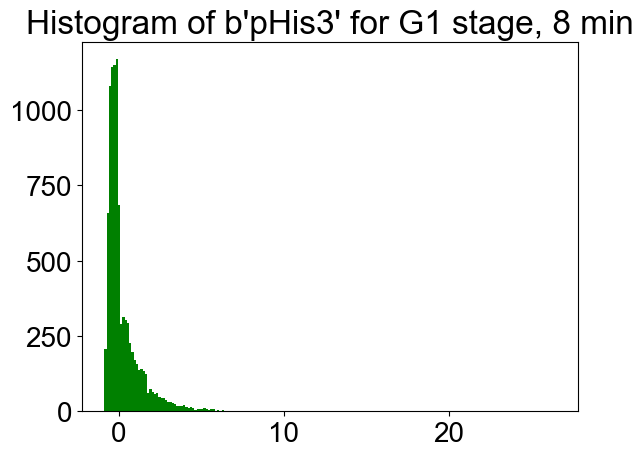


Processing: ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_G1.fcs is: 4.461802018340677e-05
It is located in column index: 21
The parameter with the smallest positive value is: b'pMARCKS'


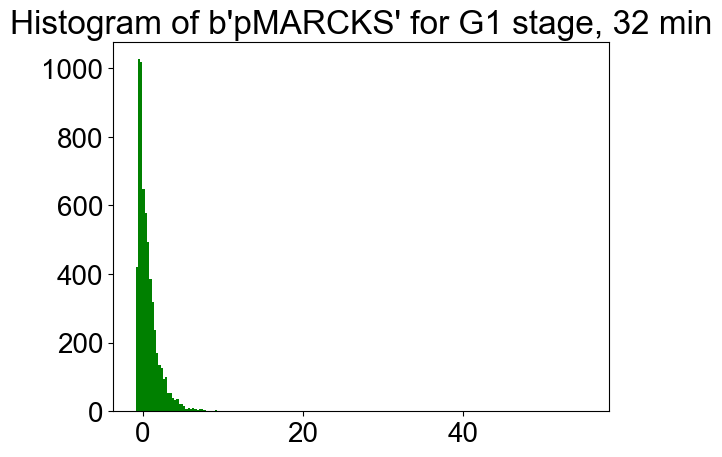


Processing: ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_G1.fcs is: 1.9524197796272347e-06
It is located in column index: 30
The parameter with the smallest positive value is: b'110'


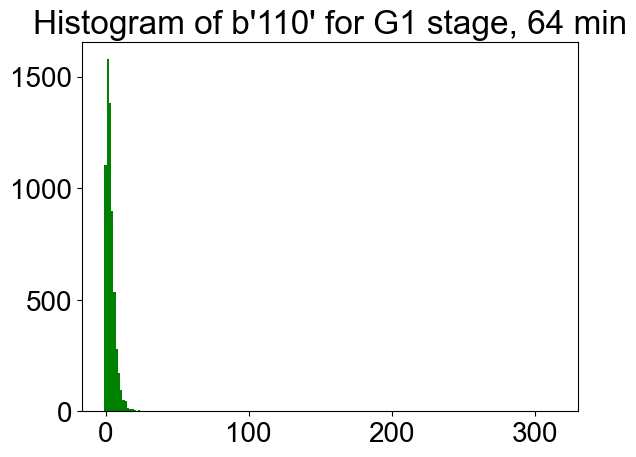


Processing: ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_G1.fcs is: 4.5733104343526065e-05
It is located in column index: 4
The parameter with the smallest positive value is: b'pSrc'


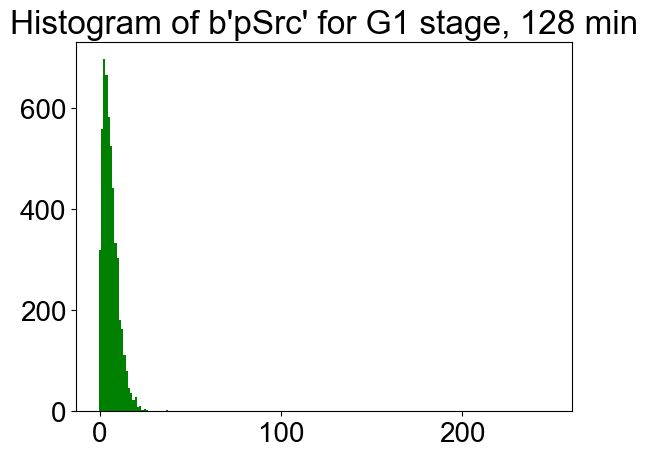


Processing: ./data/NKL_greg/NKG2D/NKG2D_256min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_256min_UMAP_G1.fcs is: 4.45165132987313e-05
It is located in column index: 4
The parameter with the smallest positive value is: b'pSrc'


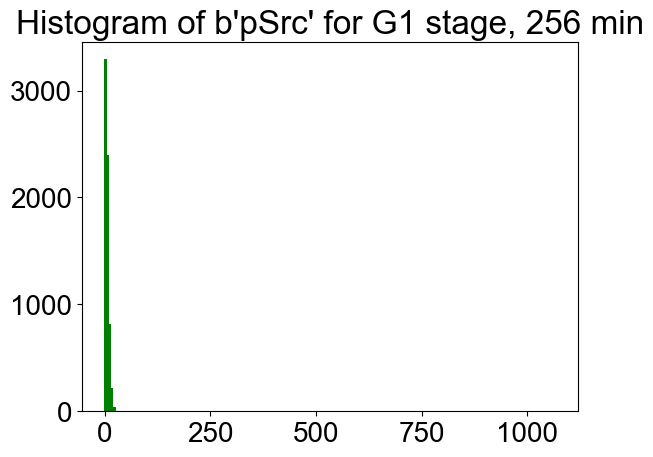


Processing: ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_S.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_S.fcs is: 3.487256662992877e-06
It is located in column index: 8
The parameter with the smallest positive value is: b'148'


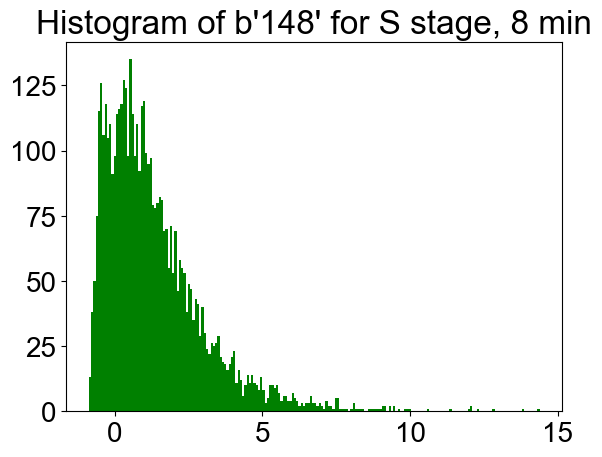


Processing: ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_S.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_S.fcs is: 2.8722679417114705e-05
It is located in column index: 21
The parameter with the smallest positive value is: b'pMARCKS'


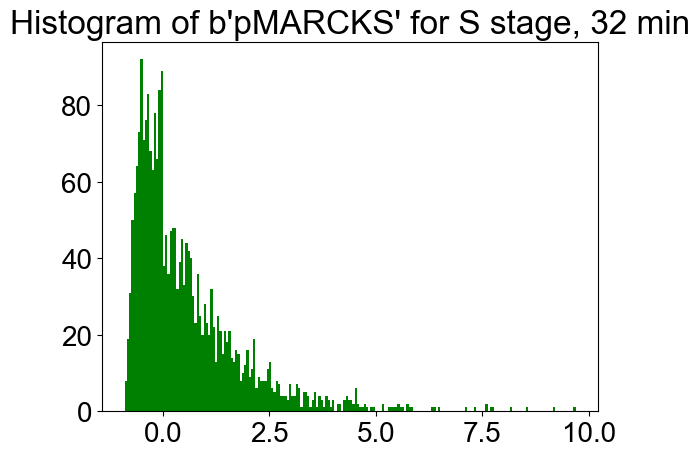


Processing: ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_S.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_S.fcs is: 0.00023380883794743568
It is located in column index: 0
The parameter with the smallest positive value is: b'CD11a'


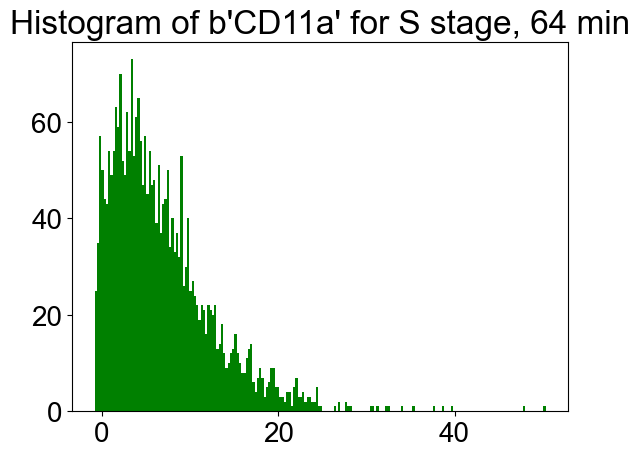


Processing: ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_S.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_S.fcs is: 2.8631300665438175e-05
It is located in column index: 10
The parameter with the smallest positive value is: b'pStat5'


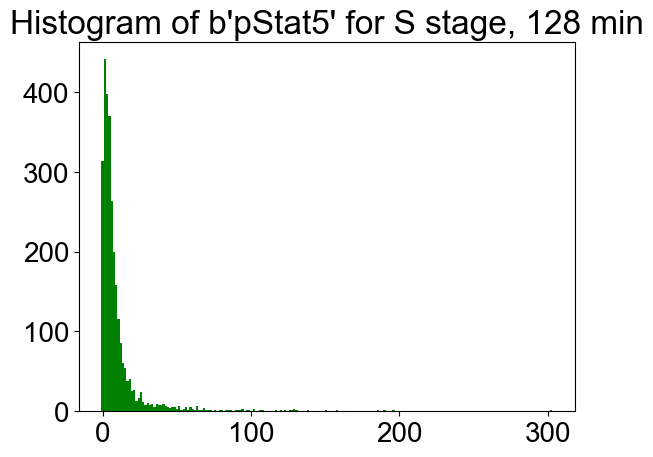


Processing: ./data/NKL_greg/NKG2D/NKG2D_256min_UMAP_S.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_256min_UMAP_S.fcs is: 0.00015244106180034578
It is located in column index: 5
The parameter with the smallest positive value is: b'pAMPK'


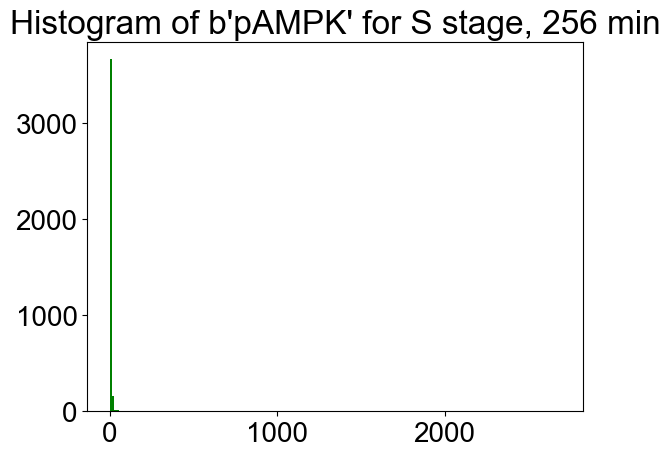


Processing: ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_G2.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_G2.fcs is: 0.0006334428326226771
It is located in column index: 11
The parameter with the smallest positive value is: b'CD107a'


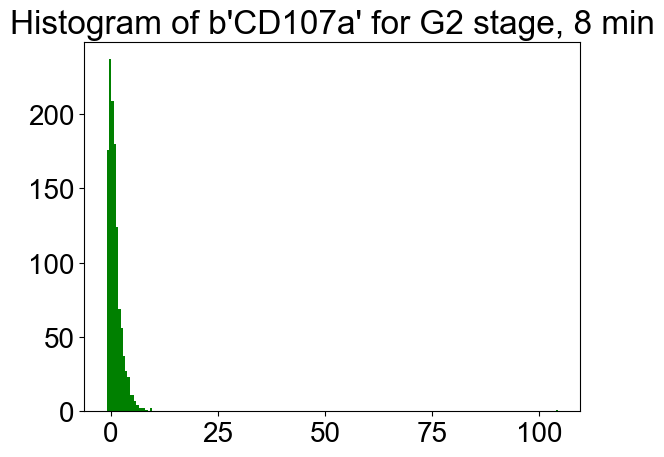


Processing: ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_G2.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_G2.fcs is: 0.0005919393734075129
It is located in column index: 45
The parameter with the smallest positive value is: b'pCreb'


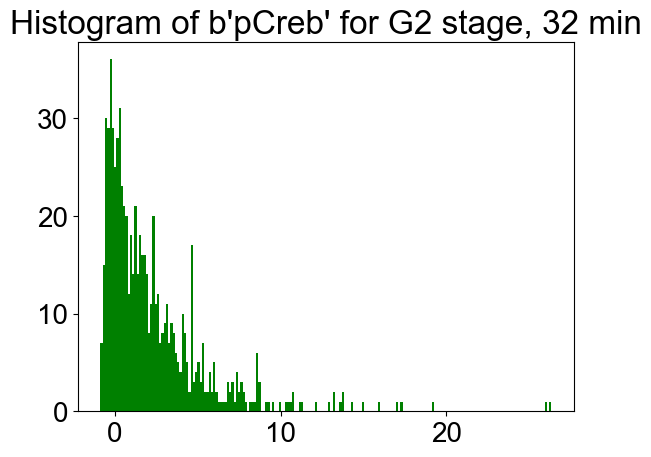


Processing: ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_G2.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_G2.fcs is: 1.2563938071252778e-05
It is located in column index: 12
The parameter with the smallest positive value is: b'pAkt'


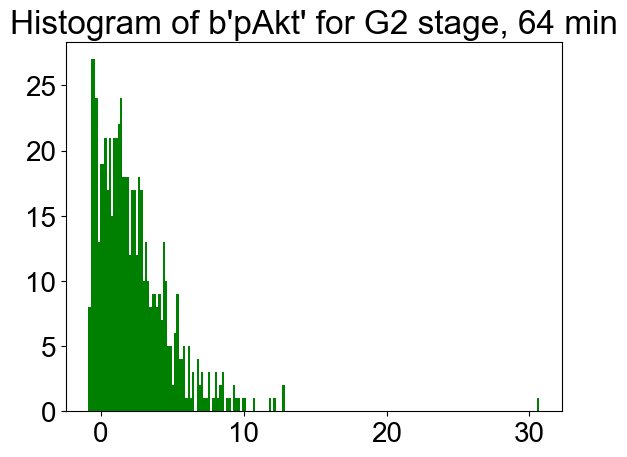


Processing: ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_G2.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_G2.fcs is: 2.6610350687406026e-05
It is located in column index: 21
The parameter with the smallest positive value is: b'pMARCKS'


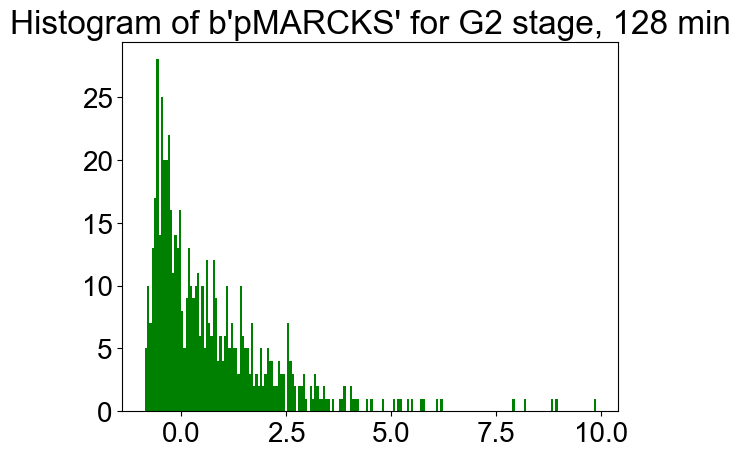


Processing: ./data/NKL_greg/NKG2D/NKG2D_256min_UMAP_G2.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_256min_UMAP_G2.fcs is: 5.792434967588633e-05
It is located in column index: 8
The parameter with the smallest positive value is: b'148'


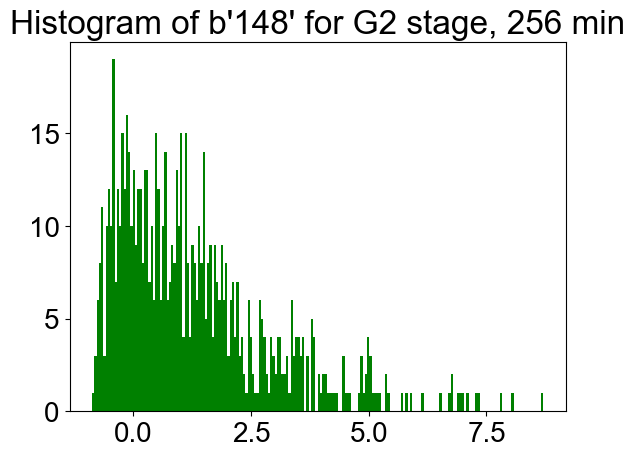

   Stage  Time Point  Smallest Positive Value   Parameter  Average Value  \
0     G1           8                 0.000038    b'pHis3'       0.247286   
1     G1          32                 0.000045  b'pMARCKS'       0.631579   
2     G1          64                 0.000002      b'110'       3.696426   
3     G1         128                 0.000046     b'pSrc'       5.789229   
4     G1         256                 0.000045     b'pSrc'       5.826992   
5      S           8                 0.000003      b'148'       1.343207   
6      S          32                 0.000029  b'pMARCKS'       0.556568   
7      S          64                 0.000234    b'CD11a'       6.751025   
8      S         128                 0.000029   b'pStat5'       9.645225   
9      S         256                 0.000152    b'pAMPK'       8.270109   
10    G2           8                 0.000633   b'CD107a'       1.059893   
11    G2          32                 0.000592    b'pCreb'       2.243092   
12    G2    

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fcsextract

# List of cell cycle stages and time points
cell_cycle_stages = ['G1', 'S', 'G2']
time_points = [8, 32, 64, 128, 256]

# Initialize the list to store results
results = []

# Loop through each combination of cell cycle stage and time point
for stage in cell_cycle_stages:
    for time_point in time_points:
        # Construct the filename based on the current stage and time point
        filename = f'./data/NKL_greg/NKG2D/NKG2D_{time_point}min_UMAP_{stage}.fcs'
        
        # Use fcsextract to parse the FCS file
        metadata, data = fcsextract.fcsextract(filename)
        
        print(f"\nProcessing: {filename}")
        
        # Convert to numpy array
        data = np.array(data)

        # Extracting parameter names
        param_names = []
        for i in range(int(metadata[b'$PAR'])):
            param_names.append(metadata.get(b"$P%dS"%(i+1), metadata[b"$P%dN"%(i+1)]))
        
        # Select the relevant data (columns of interest)
        data = data[:, 3:49]  # Adjust this if necessary based on your dataset
        param_names = param_names[3:49]
        
        # Find the smallest positive number in the data
        positive_data = data[data > 0]  # Filter out non-positive numbers (<= 0)
        smallest_positive_value = np.min(positive_data)  # Find the smallest positive value
        
        # Find the column index where the smallest positive value is located
        indices = np.where(data == smallest_positive_value)
        column_index = indices[1][0]  # Get the first occurrence of the smallest positive value
        
        # Get the parameter name for this column
        param_name_with_smallest_value = param_names[column_index]
        
        print(f"The smallest positive value in {filename} is: {smallest_positive_value}")
        print(f"It is located in column index: {column_index}")
        print(f"The parameter with the smallest positive value is: {param_name_with_smallest_value}")
        
        # Plotting the histogram for the protein corresponding to the smallest positive value
        Y = data[:, column_index]
        Y_pos = Y[Y > 0]
        
        plt.hist(Y, bins=200, color='g')
        plt.title(f"Histogram of {param_name_with_smallest_value} for {stage} stage, {time_point} min")
        plt.show()
        
        # Store the results
        results.append({
            'Stage': stage,
            'Time Point': time_point,
            'Smallest Positive Value': smallest_positive_value,
            'Parameter': param_name_with_smallest_value,
            'Average Value': np.mean(Y),
            'Min Value': np.min(Y_pos),
            'Data Size': len(Y)
        })

# Convert results to a DataFrame for easy review
results_df = pd.DataFrame(results)
print(results_df)



Processing: ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_8min_UMAP_G1.fcs is: 3.809858753811568e-05
It is located in column index: 19
The parameter with the smallest positive value is: b'pHis3'

Processing: ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_32min_UMAP_G1.fcs is: 4.461802018340677e-05
It is located in column index: 21
The parameter with the smallest positive value is: b'pMARCKS'

Processing: ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_64min_UMAP_G1.fcs is: 1.9524197796272347e-06
It is located in column index: 30
The parameter with the smallest positive value is: b'110'

Processing: ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_G1.fcs
The smallest positive value in ./data/NKL_greg/NKG2D/NKG2D_128min_UMAP_G1.fcs is: 4.5733104343526065e-05
It is located in column index: 4
The parameter with the smallest pos

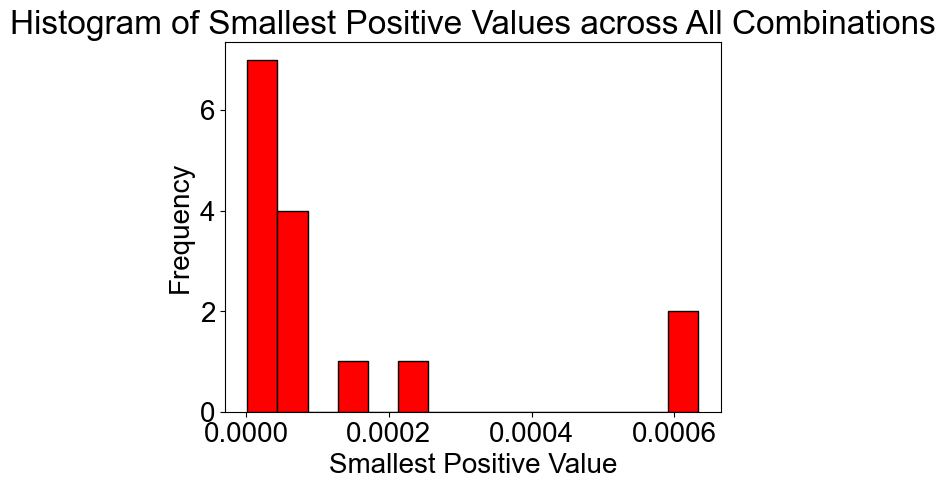

    Smallest Positive Value
0                  0.000038
1                  0.000045
2                  0.000002
3                  0.000046
4                  0.000045
5                  0.000003
6                  0.000029
7                  0.000234
8                  0.000029
9                  0.000152
10                 0.000633
11                 0.000592
12                 0.000013
13                 0.000027
14                 0.000058


NameError: name 'p' is not defined

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fcsextract

# List of cell cycle stages and time points
cell_cycle_stages = ['G1', 'S', 'G2']
time_points = [8, 32, 64, 128, 256]

# Initialize a list to store all smallest positive values
smallest_positive_values = []

# Loop through each combination of cell cycle stage and time point
for stage in cell_cycle_stages:
    for time_point in time_points:
        # Construct the filename based on the current stage and time point
        filename = f'./data/NKL_greg/NKG2D/NKG2D_{time_point}min_UMAP_{stage}.fcs'
        
        # Use fcsextract to parse the FCS file
        metadata, data = fcsextract.fcsextract(filename)
        
        print(f"\nProcessing: {filename}")
        
        # Convert to numpy array
        data = np.array(data)

        # Extracting parameter names
        param_names = []
        for i in range(int(metadata[b'$PAR'])):
            param_names.append(metadata.get(b"$P%dS"%(i+1), metadata[b"$P%dN"%(i+1)]))
        
        # Select the relevant data (columns of interest)
        data = data[:, 3:49]  # Adjust this if necessary based on your dataset
        param_names = param_names[3:49]
        
        # Find the smallest positive number in the data
        positive_data = data[data > 0]  # Filter out non-positive numbers (<= 0)
        smallest_positive_value = np.min(positive_data)  # Find the smallest positive value
        
        # Store this smallest positive value in the list
        smallest_positive_values.append(smallest_positive_value)
        
        # Find the column index where the smallest positive value is located
        indices = np.where(data == smallest_positive_value)
        column_index = indices[1][0]  # Get the first occurrence of the smallest positive value
        
        # Get the parameter name for this column
        param_name_with_smallest_value = param_names[column_index]
        
        print(f"The smallest positive value in {filename} is: {smallest_positive_value}")
        print(f"It is located in column index: {column_index}")
        print(f"The parameter with the smallest positive value is: {param_name_with_smallest_value}")
        
# Plot a red histogram for the smallest positive values across all combinations
plt.hist(smallest_positive_values, bins=15, color='r', edgecolor='black')  # Red histogram
plt.title("Histogram of Smallest Positive Values across All Combinations")
plt.xlabel("Smallest Positive Value")
plt.ylabel("Frequency")
#plt.xscale('log')
plt.show()

# Convert results to a DataFrame for easy review (optional)
results_df = pd.DataFrame(smallest_positive_values, columns=["Smallest Positive Value"])
print(results_df)
